In [14]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [38]:
rf_info = pd.read_csv("Risk_free_rate.csv", parse_dates = ["Date"], index_col = "Date")
# calculate the product once and pass it as an argument to the function
rf_cumprod = (1+rf_info/100).cumprod() 
rf_date, cumprod_rf  =  rf_info.index, rf_cumprod.values.tolist()

In [45]:
def jensen_alpha(start_date,rf_date,cumprod_rf,rp, rm , B):
    # Find date in rf that is greater than or equal to trading date
    idx = rf_date.searchsorted(start_date)
    end_idx = rf_date.searchsorted(start_date+ timedelta(days= 365 ) )
    try:
        if idx < end_idx:
            rf = cumprod_rf[end_idx -1][1] / cumprod_rf[idx-1][1] -1
            rm_rf = rm - rf
           
        else:
            rf = cumprod_rf[idx][1] / cumprod_rf[idx - 1][1] -1
            rm_rf =  rm - rf
    except IndexError:
        return None
    
    # rp is percent return
    # b is beta
    if(rp == -999 or B == -999):
        return None
    #print(rp,rf,B, rm_rf)
    return rp - rf - B * rm_rf

In [63]:
def simple_alpha(rp,rm):
    return rp - rm

In [156]:
import os
import pandas as pd
from scipy.stats.mstats import gmean
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
directory = "tuning_output"

In [ ]:
df[]

In [181]:
# THIS CELL CALCULATES ALPHAS AND BOXPLOTS 
def calculate_gmean(group):
    return gmean(group + 1) - 1



df = pd.read_csv('tuning_output/outputs_3.csv')
df = df[df['sp Annual (90)'] != -999]
df = df[df['beta'] >= 0]
df = df[df['beta'] <= 3.0]
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.month.isin([1,2,3,4])] #VALIIDATION SET
# df = df[df['Date'].dt.month.isin([5,6,7,8,9, 10, 11, 12])] # TESTING SET


grouped_df = df.groupby(['year', 'k'])
grouped_averages = grouped_df.mean()
k_betas = list(grouped_averages['beta'])
cols = ['Percent Return (7)', 'Percent Return (14)', 'Percent Return (90)']
k_returns_7 = list(grouped_df['Percent Return (7)'].apply(calculate_gmean))
k_returns_14 = list(grouped_df['Percent Return (14)'].apply(calculate_gmean))
k_returns_90 = list(grouped_df['Percent Return (90)'].apply(calculate_gmean))


k_sp_returns_7 = list(grouped_df['sp Percent(7)'].apply(calculate_gmean))
k_sp_returns_14 = list(grouped_df['sp Percent(14)'].apply(calculate_gmean))
k_sp_returns_90 = list(grouped_df['sp Percent(90)'].apply(calculate_gmean))


#     yearly_sp_returns = k_sp_returns.groupby('year').apply(gmean)
#     yearly_sp_returns = yearly_sp_returns - 1

dates = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']

def calculate_alphas(dates, rf_date, cumprod_rf, k_returns_7, k_returns_14, k_returns_90, 
                     k_sp_returns_7, k_sp_returns_14, k_sp_returns_90, k_betas, K):


    alphas_7 = []
    jensen_alphas_7 = []

    alphas_14 = []
    jensen_alphas_14 = []

    alphas_90 = []
    jensen_alphas_90 = []

    k_s = []
    k_years = []
    for i in range(len(dates)):
        date = datetime.strptime(dates[i], '%Y-%m-%d')
    
        for k in range(K):
            k_s.append(k)
            k_years.append(date.year)
            idx = i*K + k
            jen_7 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_7[idx], k_sp_returns_7[idx], k_betas[idx])
            sim_7 = simple_alpha(k_returns_7[idx], k_sp_returns_7[idx])
            jensen_alphas_7.append(jen_7)
            alphas_7.append(sim_7)


            jen_14 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_14[idx], k_sp_returns_14[idx], k_betas[idx])
            sim_14 = simple_alpha(k_returns_14[idx], k_sp_returns_14[idx])
            jensen_alphas_14.append(jen_14)
            alphas_14.append(sim_14)

            jen_90 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_90[idx], k_sp_returns_90[idx], k_betas[idx])
            sim_90 = simple_alpha(k_returns_90[idx], k_sp_returns_90[idx])
            jensen_alphas_90.append(jen_90)
            alphas_90.append(sim_90)


    data_dict = { "Year": k_years, 
                 "beta": k_betas,
                 "K": k_s,
                 "Percent Returns (7)": k_returns_7,
                 "sp Percent (7)": k_sp_returns_7,
                 "Simple Alpha (7)": alphas_7,
                 "Jensen Alpha (7)": jensen_alphas_7,

                 "Percent Returns (14)": k_returns_14,
                 "sp Percent (14)": k_sp_returns_14,
                 "Simple Alpha (14)": alphas_14,
                 "Jensen Alpha (14)": jensen_alphas_14,

                 "Percent Returns (90)": k_returns_90,
                 "sp Percent (90)": k_sp_returns_90,
                 "Simple Alpha (90)": alphas_90,
                 "Jensen Alpha (90)": jensen_alphas_90,
                }

    df = pd.DataFrame(data_dict)
    return df
        
        
                
        
new_df = calculate_alphas(dates, rf_date, cumprod_rf, k_returns_7, k_returns_14, k_returns_90, 
                     k_sp_returns_7, k_sp_returns_14, k_sp_returns_90, k_betas, K=5)
    

/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/950329853.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


Text(0, 0.5, 'Alpha')

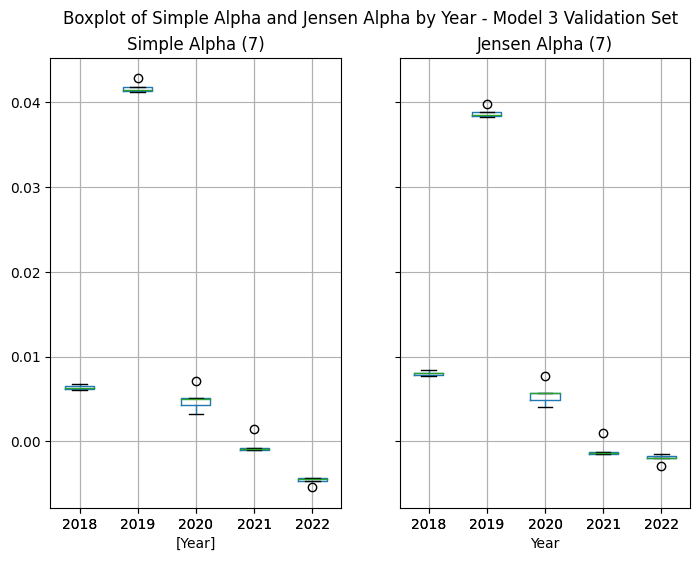

In [182]:

new_df.boxplot(column=['Simple Alpha (7)', 'Jensen Alpha (7)'], by=['Year'], figsize=(8, 6))
plt.suptitle('Boxplot of Simple Alpha and Jensen Alpha by Year - Model 3 Validation Set')
plt.xlabel('Year')
plt.ylabel('Alpha')
# plt.show()

In [ ]:

sns.boxplot(column=['Simple Alpha (90)', 'Jensen Alpha (90)'], by=['Year'], figsize=(8, 6))
plt.title('Boxplot of Simple Alpha and Jensen Alpha by Year')
# plt.show()

In [130]:
# THIS CELL ORGANIZES EVERY OUTPUT FILE AND AVERGATES TO FIND BEST MODEL
def calculate_gmean(group):
    return gmean(group + 1) - 1

total = pd.DataFrame()

for filename in (os.listdir(directory)):
    print(filename)
    f = os.path.join(directory, filename)
    df = pd.read_csv(f)
    df = df[df['sp Annual (90)'] != -999]
    df = df[df['beta'] >= 0]
    df = df[df['beta'] <= 3.0]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.month.isin([1,2,3,4])]
    
    
    grouped_df = df.groupby(['year', 'k'])
    grouped_averages = grouped_df.mean()
    k_betas = list(grouped_averages['beta'])
    cols = ['Percent Return (7)', 'Percent Return (14)', 'Percent Return (90)']
    k_returns_7 = list(grouped_df['Percent Return (7)'].apply(calculate_gmean))
    k_returns_14 = list(grouped_df['Percent Return (14)'].apply(calculate_gmean))
    k_returns_90 = list(grouped_df['Percent Return (90)'].apply(calculate_gmean))

    
    k_sp_returns_7 = list(grouped_df['sp Percent(7)'].apply(calculate_gmean))
    k_sp_returns_14 = list(grouped_df['sp Percent(14)'].apply(calculate_gmean))
    k_sp_returns_90 = list(grouped_df['sp Percent(90)'].apply(calculate_gmean))


#     yearly_sp_returns = k_sp_returns.groupby('year').apply(gmean)
#     yearly_sp_returns = yearly_sp_returns - 1

    dates = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']
    
    def calculate_alphas(dates, rf_date, cumprod_rf, k_returns_7, k_returns_14, k_returns_90, 
                         k_sp_returns_7, k_sp_returns_14, k_sp_returns_90, k_betas, K):
        
        years = []
        avg_alphas_7 = []
        avg_alphas_14 = []
        avg_alphas_90 = []
        
        avg_jen_alphas_7 = []
        avg_jen_alphas_14 = []
        avg_jen_alphas_90 = []
        
        for i in range(len(dates)):
            date = datetime.strptime(dates[i], '%Y-%m-%d')
            years.append(date.year)
            
            alphas_7 = []
            jensen_alphas_7 = []

            alphas_14 = []
            jensen_alphas_14 = []

            alphas_90 = []
            jensen_alphas_90 = []
            for k in range(K):
#                 k_s.append(k)
#                 k_years.append(date.year)
                idx = i*K + k
                jen_7 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_7[idx], k_sp_returns_7[idx], k_betas[idx])
                sim_7 = simple_alpha(k_returns_7[idx], k_sp_returns_7[idx])
                jensen_alphas_7.append(jen_7)
                alphas_7.append(sim_7)


                jen_14 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_14[idx], k_sp_returns_14[idx], k_betas[idx])
                sim_14 = simple_alpha(k_returns_14[idx], k_sp_returns_14[idx])
                jensen_alphas_14.append(jen_14)
                alphas_14.append(sim_14)

                jen_90 = jensen_alpha(date, rf_date, cumprod_rf, k_returns_90[idx], k_sp_returns_90[idx], k_betas[idx])
                sim_90 = simple_alpha(k_returns_90[idx], k_sp_returns_90[idx])
                jensen_alphas_90.append(jen_90)
                alphas_90.append(sim_90)
               
            
            
            
            avg_alphas_7.append(np.mean(alphas_7))
            avg_alphas_14.append(np.mean(alphas_14))
            avg_alphas_90.append(np.mean(alphas_90))
            
            
            avg_jen_alphas_7.append(np.mean(jensen_alphas_7))
            avg_jen_alphas_14.append(np.mean(jensen_alphas_14))
            avg_jen_alphas_90.append(np.mean(jensen_alphas_90))
            


        data_dict = { 
                    "Year": years, 
                     #"beta": k_betas,
                     #"K": k_s,
                     #"Percent Returns (7)": k_returns_7,
                     #"sp Percent (7)": k_sp_returns_7,
                     "Simple Alpha (7)": avg_alphas_7,
                     "Jensen Alpha (7)": avg_jen_alphas_7,
                     
                     #"Percent Returns (14)": k_returns_14,
                     #"sp Percent (14)": k_sp_returns_14,
                     "Simple Alpha (14)": avg_alphas_14,
                     "Jensen Alpha (14)": avg_jen_alphas_14,
                     
                     #"Percent Returns (90)": k_returns_90,
                     #"sp Percent (90)": k_sp_returns_90,
                     "Simple Alpha (90)": avg_alphas_90,
                     "Jensen Alpha (90)": avg_jen_alphas_90,
                    }
        
        df = pd.DataFrame(data_dict).mean().to_frame().T
        df['output_num'] = filename.split('.')[0]
        
        return df
        
                
        
    df_avg_values = calculate_alphas(dates, rf_date, cumprod_rf, k_returns_7, k_returns_14, k_returns_90, 
                         k_sp_returns_7, k_sp_returns_14, k_sp_returns_90, k_betas, K=5)
    total = pd.concat([total, df_avg_values])
    
    print(df_avg_values)
    

outputs_8.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.006758          0.007044           0.008459   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.009295          -0.001013          -0.001564  outputs_8  
outputs_9.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.007316          0.007325           0.009119   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.009566          -0.005129          -0.006826  outputs_9  
outputs_18.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.006006          0.006072           0.007212   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.007685          -0.003808          -0.005142  outputs_18  
outputs_19.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.007108          0.007442           0.009361   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.009969             0.0208           0.018093  outputs_19  
outputs_12.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.005453          0.005991           0.006868   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.007783           0.017165           0.015872  outputs_12  
outputs_13.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0           0.00499          0.005247           0.006324   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0            0.00682           0.013046           0.011056  outputs_13  
outputs_11.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.006758          0.007044           0.008459   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.009295          -0.001013          -0.001564  outputs_11  
outputs_10.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.007649          0.007488           0.009767   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0            0.01017          -0.014371          -0.015822  outputs_10  
outputs_14.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.006291          0.006325           0.007969   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.008438          -0.006043          -0.007251  outputs_14  
outputs_15.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.005453          0.005991           0.006868   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.007783           0.017165           0.015872  outputs_15  
outputs_17.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.005873          0.006098           0.008688   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.009199           0.012571           0.010056  outputs_17  
outputs_16.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.007108          0.007442           0.009361   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90)  output_num  
0           0.009969             0.0208           0.018093  outputs_16  
outputs_1.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.008999          0.009316           0.009036   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.010363           -0.01702            -0.0184  outputs_1  
outputs_0.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0           0.00958          0.009882            0.00959   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.010908          -0.016308          -0.017642  outputs_0  
outputs_2.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.008621          0.009011           0.009009   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0            0.01037          -0.014011          -0.015236  outputs_2  
outputs_3.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0           0.00958          0.009882            0.00959   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.010908          -0.016308          -0.017642  outputs_3  
outputs_7.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0           0.00799          0.007907           0.010781   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0            0.01148           -0.01577          -0.017306  outputs_7  
outputs_6.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.009195          0.009003           0.011062   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0            0.01157          -0.016491          -0.018643  outputs_6  
outputs_4.csv


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0           0.00799          0.007907           0.010781   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0            0.01148           -0.01577          -0.017306  outputs_4  
outputs_5.csv
     Year  Simple Alpha (7)  Jensen Alpha (7)  Simple Alpha (14)  \
0  2020.0          0.007994          0.007866            0.01106   

   Jensen Alpha (14)  Simple Alpha (90)  Jensen Alpha (90) output_num  
0           0.011657          -0.016163          -0.017927  outputs_5  


/var/folders/nj/5crsgjwx3sxd51h31pmwlxj80000gn/T/ipykernel_6289/3858518588.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_averages = grouped_df.mean()


In [186]:
total.sort_values(['Simple Alpha (90)'], ascending=[False])

,Year,Simple Alpha (7),Jensen Alpha (7),Simple Alpha (14),Jensen Alpha (14),Simple Alpha (90),Jensen Alpha (90),output_num
0,2020.0,0.007108,0.007442,0.009361,0.009969,0.020800,0.018093,outputs_16
0,2020.0,0.007108,0.007442,0.009361,0.009969,0.020800,0.018093,outputs_19
0,2020.0,0.005453,0.005991,0.006868,0.007783,0.017165,0.015872,outputs_15
0,2020.0,0.005453,0.005991,0.006868,0.007783,0.017165,0.015872,outputs_12
0,2020.0,0.004990,0.005247,0.006324,0.006820,0.013046,0.011056,outputs_13
0,2020.0,0.005873,0.006098,0.008688,0.009199,0.012571,0.010056,outputs_17
0,2020.0,0.006758,0.007044,0.008459,0.009295,-0.001013,-0.001564,outputs_8
0,2020.0,0.006758,0.007044,0.008459,0.009295,-0.001013,-0.001564,outputs_11
0,2020.0,0.006006,0.006072,0.007212,0.007685,-0.003808,-0.005142,outputs_18
0,2020.0,0.007316,0.007325,0.009119,0.009566,-0.005129,-0.006826,outputs_9
